<a href="https://colab.research.google.com/github/ChardyBalla/Chardy/blob/main/Data_Visualizations_with_Python_Matplotlib_Chart_Customization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualizations with Python: Matplotlib Chart Customization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this notebook, we aim to learn the following:
1. Customize Figure and Axis Titles
1. Change line and marker styles and colors
1. Show and adjust legend position
1. Create subplots

## Imports and Data Preparation

We first import the pyplot module from matplotlib:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We also do `%matplotlib inline` for notebook sessions such as this. This line makes matplotlib render the charts as static visualizations within the notebook.


Let's work with the employee attrition dataset from the previous lessons.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Refocus Module/Jupyter Notebook-20230501T012835Z-001/Jupyter Notebook/datasets/hr_employee_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2


Remove the outliers based on daily rate (those with daily rates greater than 10,000) for our visualization examples.

In [4]:
df = df[df.DailyRate<1e4]

Let's also get the average rate per working year from the previous notebook.

In [5]:
df_rate_per_working_year = df.groupby('TotalWorkingYears').DailyRate.mean()
df_rate_per_working_year.head()

TotalWorkingYears
0    667.545455
1    806.444444
2    719.870968
3    812.285714
4    721.209677
Name: DailyRate, dtype: float64

<Axes: xlabel='TotalWorkingYears'>

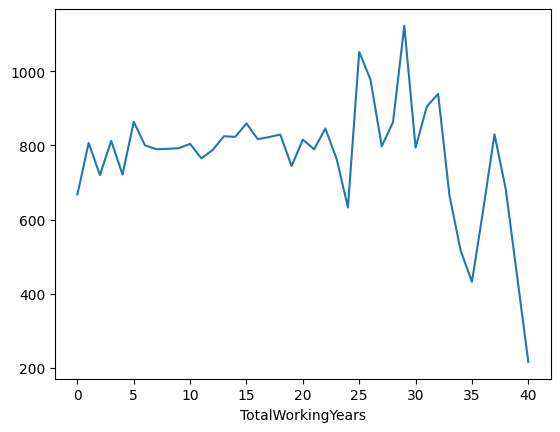

In [6]:
df_rate_per_working_year.plot()

Let's also get the attrition per department chart.

In [7]:
df_attrition_per_dept = df.groupby(['DepartmentInCompany', 'Attrition']).size()
df_attrition_per_dept.head()

DepartmentInCompany     Attrition
Human Resources         No            53
                        Yes           12
Research & Development  No           819
                        Yes          132
Sales                   No           353
dtype: int64

In [8]:
# we need to set it up such the the attrition values are in the columns
# use the unstack function
df_attrition_per_dept = df_attrition_per_dept.unstack()
df_attrition_per_dept.head()

Attrition,No,Yes
DepartmentInCompany,,
Human Resources,53.0,12.0
Research & Development,819.0,132.0
Sales,353.0,91.0
none,3.0,NaN


<Axes: ylabel='DepartmentInCompany'>

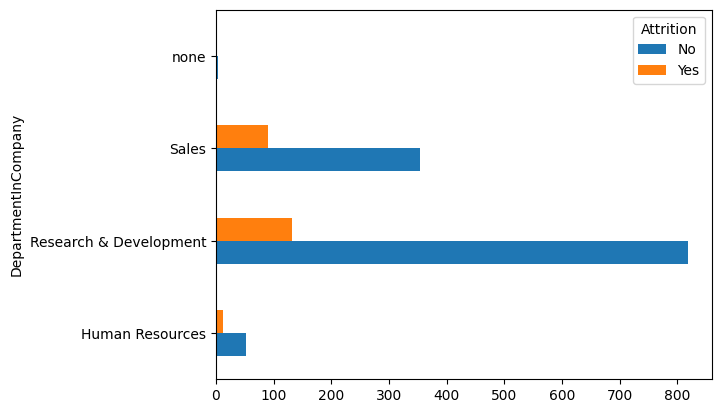

In [9]:
df_attrition_per_dept.plot(kind='barh')

## Customize Figure and Axis Titles

Text(0.5, 1.0, 'Attrition per Department')

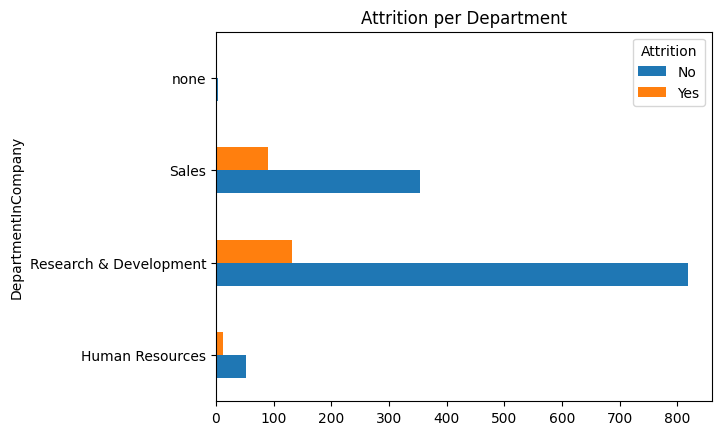

In [10]:
# Plot title can be added using the plt.title function
df_attrition_per_dept.plot(kind='barh')
plt.title('Attrition per Department')

Text(0.0, 1.0, 'Attrition per Department')

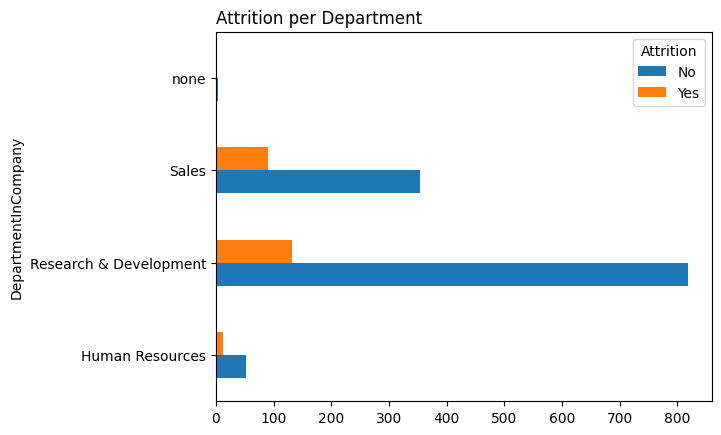

In [11]:
# location can be adjusted using the loc parameter
df_attrition_per_dept.plot(kind='barh')
plt.title('Attrition per Department', loc='left')

Text(0, 0.5, 'Department')

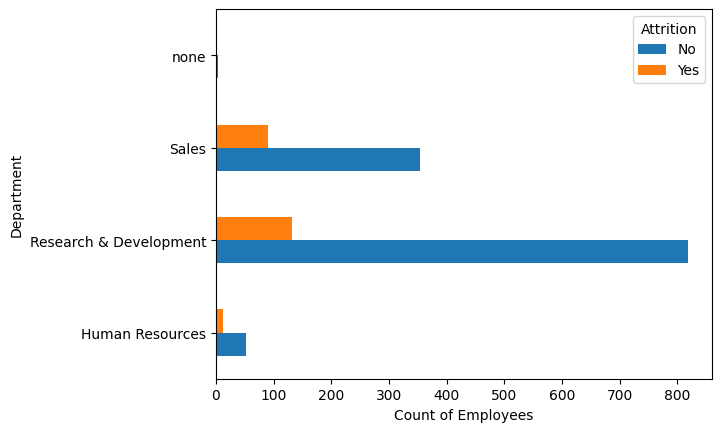

In [12]:
# x-axis labels can be added using plt.xlabel, y-axis labels using plt.ylabel
df_attrition_per_dept.plot(kind='barh')
plt.xlabel('Count of Employees')
plt.ylabel('Department')

## Customize Markers and Colors

Line styles can be changed with the `ls` parameter.

Common line styles:
1. solid: `'-'`
1. dashed: `'--'`
1. dotted: `':'`
1. dashdot: `'-.'`  

The line color can be changed with `color`. This parameter accepts string names or Hex Values and a tuple of RGB values.

<Axes: xlabel='TotalWorkingYears'>

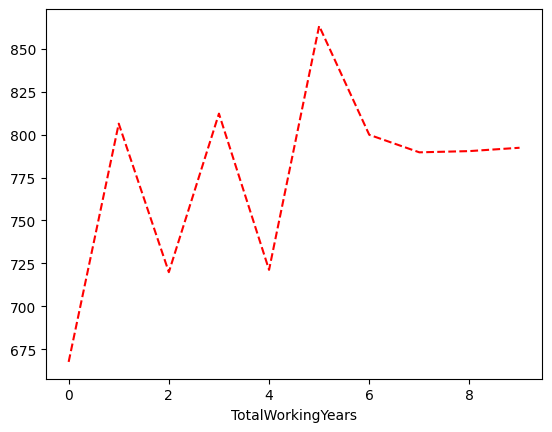

In [13]:
df_rate_per_working_year.head(10).plot(ls='--', color='red')

<Axes: xlabel='TotalWorkingYears'>

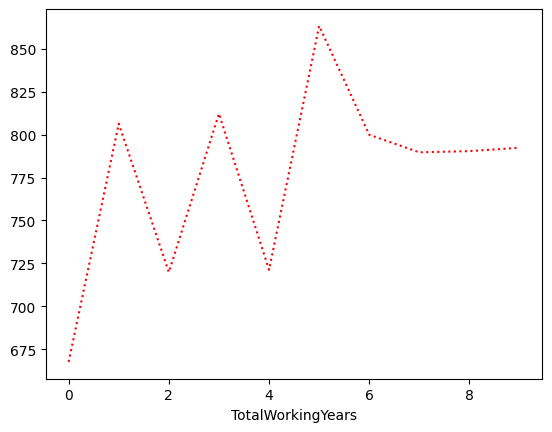

In [14]:
df_rate_per_working_year.head(10).plot(ls=':', color=(1,0,0))

<Axes: xlabel='TotalWorkingYears'>

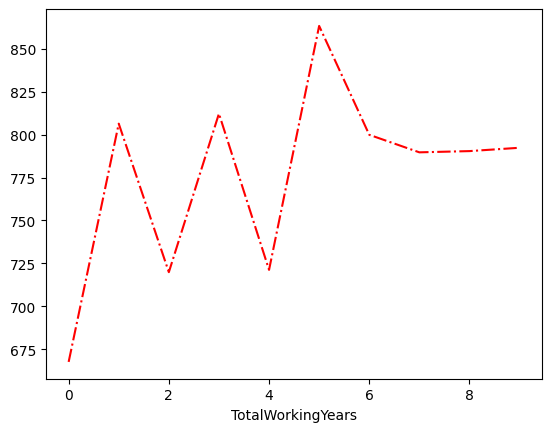

In [15]:
df_rate_per_working_year.head(10).plot(ls='-.', color='#FF0000')

Marker styles can be adchanged with the `marker` parameter.
Common marker styles:
1. Circle `'o'`
1. Triangle `'^'`
1. Plus `'+'`
1. Cross `'x'`

Similarly, marker colors, separate for face and edges, can be changed with `markerfacecolor` and `markeredgecolor`, respectively. These parameters also accept string names or Hex Values and a tuple of RGB values.


<Axes: xlabel='TotalWorkingYears'>

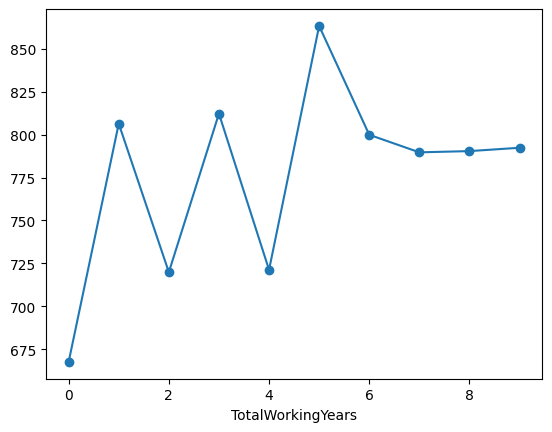

In [16]:
df_rate_per_working_year.head(10).plot(marker='o')

<Axes: xlabel='TotalWorkingYears'>

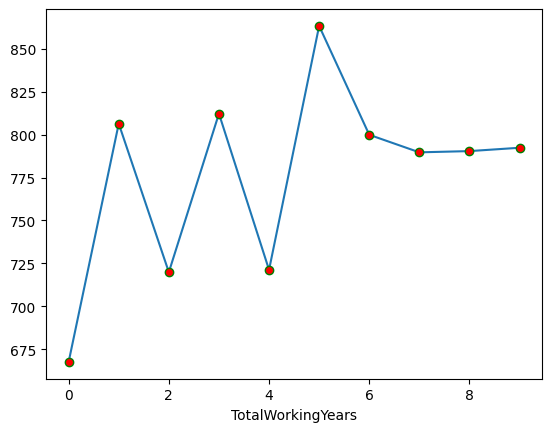

In [17]:
df_rate_per_working_year.head(10).plot(marker='o', markerfacecolor='red', markeredgecolor='green')

## Hide or Change the Legend Location

The legend can be shown or hidden with the `legend` parameter.

Location can be adjusted from `plt.legend`
- We can use the strings 'upper left', 'upper right', 'lower left', 'lower right' to place the legend at the corresponding corner.
- Use 'upper center', 'lower center', 'center left', 'center right' to place the legend at the center of the corresponding edge.
- You can also enter a pair of floats (tuple) pointing to the exact position in the figure.

<Axes: ylabel='DepartmentInCompany'>

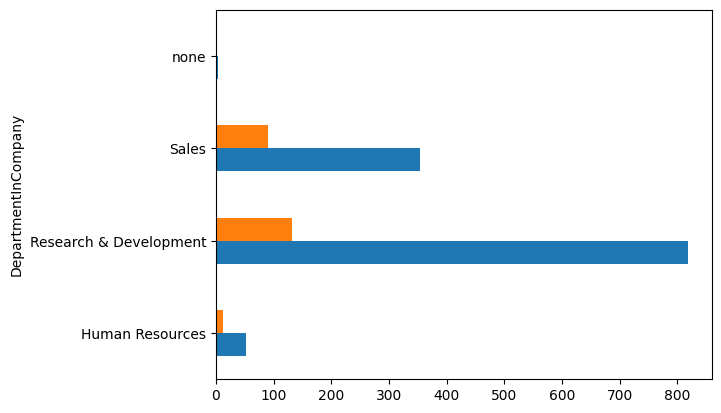

In [18]:
df_attrition_per_dept.plot(kind='barh', legend=False)

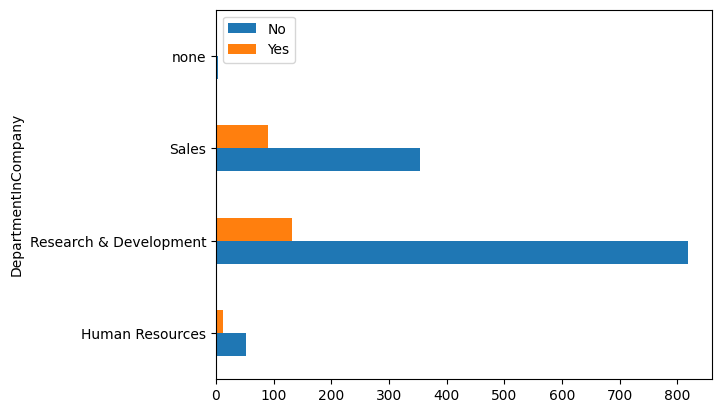

In [19]:
df_attrition_per_dept.plot(kind='barh', legend=True)
plt.legend(loc='upper left')

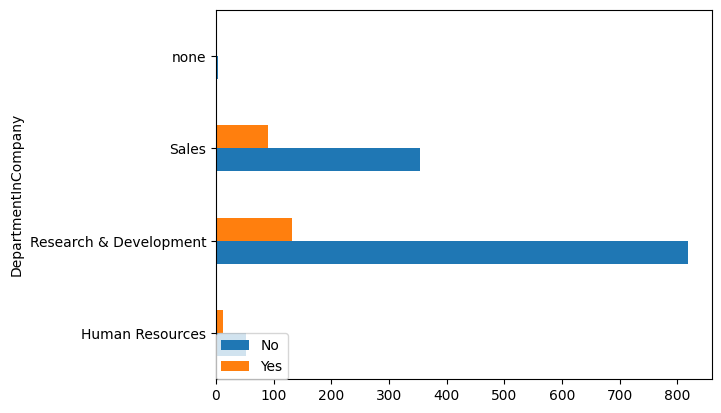

In [20]:
df_attrition_per_dept.plot(kind='barh', legend=True)
plt.legend(loc=(0,0))

## Create Subplots

We can also separate the bars/lines using the `subplots` parameter.

array([<Axes: title={'center': 'No'}, ylabel='DepartmentInCompany'>,
       <Axes: title={'center': 'Yes'}, ylabel='DepartmentInCompany'>],
      dtype=object)

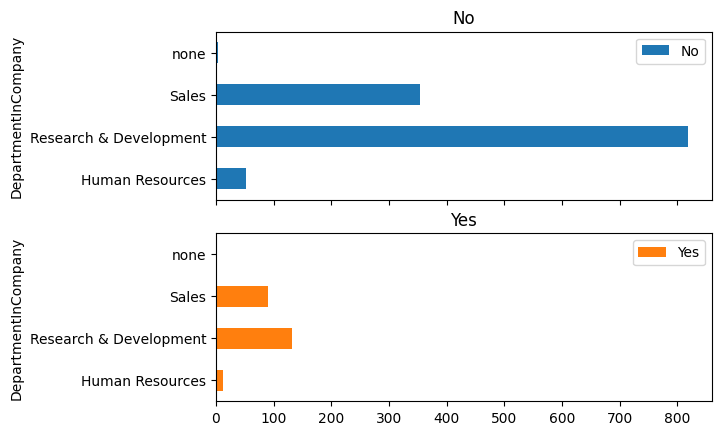

In [26]:
df_attrition_per_dept.plot(kind='barh', subplots=True)


In matplotlib, the subplots allow us to plot different charts in a single figure.

Using `plt.subpots`, our inputs will be the number of rows and columns.

outputs:
- `fig` - corresponds to the overall figure (canvas)
- `ax` - list of all charts in the figure. Instead of doing `plt.plot`, we can now do `ax.plot`. Each plot can then be customized individually (labels, lines, marker colors, etc.)

In [25]:
df_attrition_per_dept

Attrition,No,Yes
DepartmentInCompany,,
Human Resources,53.0,12.0
Research & Development,819.0,132.0
Sales,353.0,91.0
none,3.0,NaN


<BarContainer object of 4 artists>

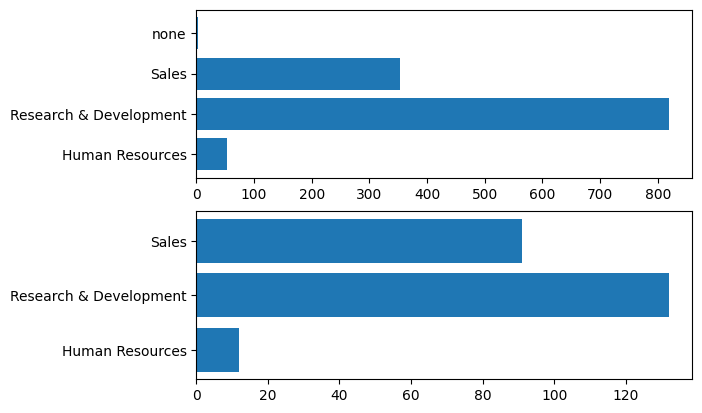

In [21]:
# 2 rows and 1 column
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.No)
ax[1].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.Yes)

<BarContainer object of 4 artists>

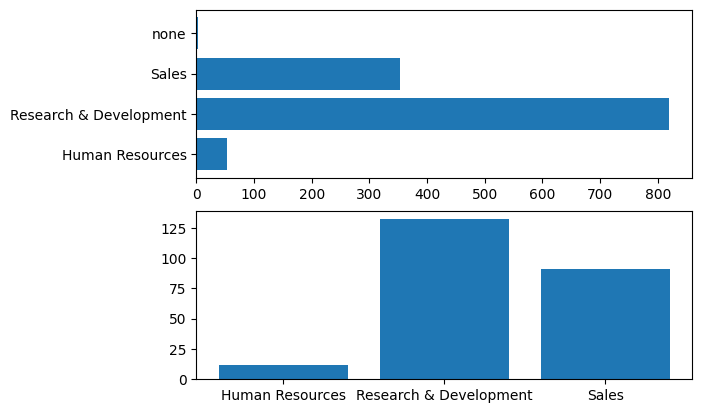

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.No)
ax[1].bar(x=df_attrition_per_dept.index, height=df_attrition_per_dept.Yes)

The axis can be shared using the `sharex` or `sharey` parameters.

<BarContainer object of 4 artists>

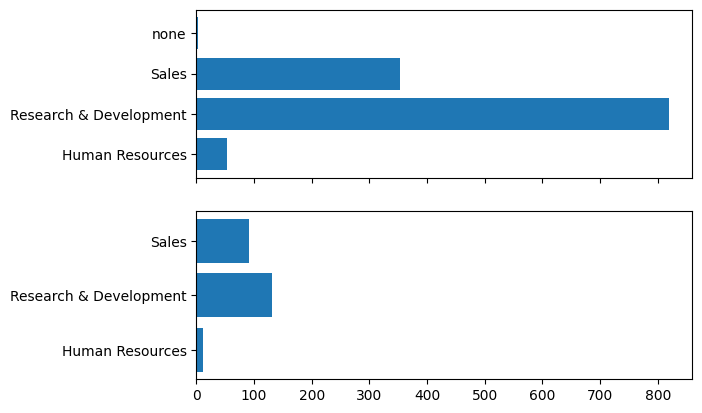

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.No)
ax[1].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.Yes)

Customize with individual titles

Text(0.5, 1.0, 'Resigned')

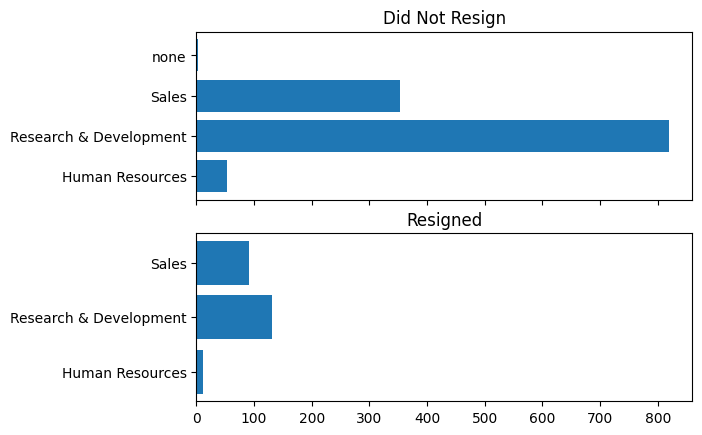

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.No)
ax[0].set_title('Did Not Resign')

ax[1].barh(y=df_attrition_per_dept.index, width=df_attrition_per_dept.Yes)
ax[1].set_title('Resigned')

There are tons of ways to customize a matplotlib chart beyond the chart types and styles presented here. Depending on your use case, you can learn how to implement the necessary charts from the [matplotlib documentation](https://matplotlib.org/stable/index.html).